In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/train.csv')

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y = train[labels].values
comments_train = train['comment_text']
comments_train = list(comments_train)

print(len(comments_train))
for item in comments_train[:5]:
  print(item)

159571
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references o

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from tqdm import tqdm_notebook
from nltk.corpus import stopwords
#Clean Data

def clean_text(text, remove_stopwords = True):
    output = ""
    text = str(text).replace("\n", "")
    text = re.sub(r'[^\w\s]','',text).lower()
    if remove_stopwords:
        text = text.split(" ")
        for word in text:
            if word not in stopwords.words("english"):
                output = output + " " + word
    else:
        output = text
    return str(output.strip())[1:-3].replace("  ", " ")
    
texts = [] 

for line in tqdm_notebook(comments_train, total=159571): 
    texts.append(clean_text(line))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/159571 [00:00<?, ?it/s]

In [ ]:
print('Sample data:', texts[1], y[1])

Sample data: aww matches background colour im seemingly stuck thanks talk 2151 january 11 2016  [0 0 0 0 0 0]


In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 120000

In [ ]:
training_sentences = texts[0:training_size]
testing_sentences = texts[training_size:]
training_labels = y[0:training_size]
testing_labels = y[training_size:]

In [ ]:
#labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print('training: ', training_labels.sum(axis=0))
print('testing: ', testing_labels.sum(axis=0))

training:  [11495  1200  6366   364  5925  1035]
testing:  [3799  395 2083  114 1952  370]


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
import numpy as np

indices = np.arange(training_padded.shape[0])
np.random.shuffle(indices)
training_padded = training_padded[indices]
training_labels = training_labels[indices]

print('Shape of training_padded tensor:', training_padded.shape)
print('Shape of training_labels tensor:', training_labels.shape)

Shape of training_padded tensor: (120000, 100)
Shape of training_labels tensor: (120000, 6)


In [ ]:
import numpy as np

indices = np.arange(testing_padded.shape[0])
np.random.shuffle(indices)
testing_padded = testing_padded[indices]
testing_labels = testing_labels[indices]

print('Shape of testing_padded tensor:', testing_padded.shape)
print('Shape of testing_labels tensor:', testing_labels.shape)

Shape of testing_padded tensor: (39571, 100)
Shape of testing_labels tensor: (39571, 6)


In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 6)                 150       
                                                                 
Total params: 160,558
Trainable params: 160,558
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 5
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/5
3750/3750 - 14s - loss: 0.1257 - accuracy: 0.9392 - val_loss: 0.0845 - val_accuracy: 0.9940 - 14s/epoch - 4ms/step
Epoch 2/5
3750/3750 - 10s - loss: 0.0741 - accuracy: 0.9942 - val_loss: 0.0725 - val_accuracy: 0.9940 - 10s/epoch - 3ms/step
Epoch 3/5
3750/3750 - 11s - loss: 0.0639 - accuracy: 0.9942 - val_loss: 0.0689 - val_accuracy: 0.9940 - 11s/epoch - 3ms/step
Epoch 4/5
3750/3750 - 10s - loss: 0.0593 - accuracy: 0.9942 - val_loss: 0.0677 - val_accuracy: 0.9940 - 10s/epoch - 3ms/step
Epoch 5/5
3750/3750 - 11s - loss: 0.0566 - accuracy: 0.9942 - val_loss: 0.0690 - val_accuracy: 0.9940 - 11s/epoch - 3ms/step


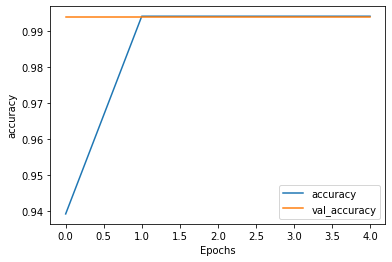

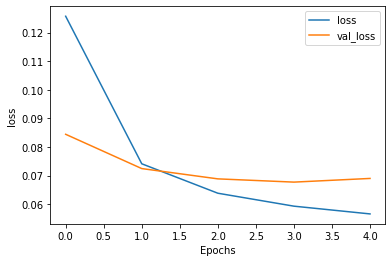

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

ecent l ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
ey man im really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual i
obscene


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
sentence = ["You freaking suck! I am going to hit you"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.7767744  0.02959567 0.44686967 0.0150065  0.41272095 0.04860168]]


In [ ]:
model.save( '/content/model.h5' )

In [ ]:
export_dir = '/content/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: /content/assets


In [ ]:
import pathlib
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

644456

In [ ]:
import json

with open( '/content/word_dict.json' , 'w' ) as file:
	json.dump( tokenizer.word_index , file )